In [280]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_transaction = pd.read_excel("C:/Users/Rohan Verma/Desktop/CaseStudy/Credit_Euro/Section3.xlsx", sheet_name='Transaction Data')
df_customer_payment = pd.read_excel("C:/Users/Rohan Verma/Desktop/CaseStudy/Credit_Euro/Section3.xlsx", sheet_name='Customer Payments')
df_customer_detail = pd.read_excel("C:/Users/Rohan Verma/Desktop/CaseStudy/Credit_Euro/Section3.xlsx", sheet_name='Customer Details')
df_customer_segment = pd.read_excel("C:/Users/Rohan Verma/Desktop/CaseStudy/Credit_Euro/Section3.xlsx", sheet_name='Customer Segment')
df_credit_card_details = pd.read_excel("C:/Users/Rohan Verma/Desktop/CaseStudy/Credit_Euro/Section3.xlsx", sheet_name='Credit Card Details')


In [278]:
df_transaction.replace({'Category':'Travell'}, {'Category':'Travel'})

,Customer ID,Age,Date,Category,Transaction Amount,Segment A,Segment B,Segment C
0,11001.0,15.0,2018-01-01,Travel,5375.0,0.0,0.0,1.0
1,11001.0,15.0,2018-02-01,Travel,15375.0,0.0,0.0,1.0
2,11001.0,15.0,2018-02-01,Online Shopping,10000.0,0.0,0.0,1.0
3,11002.0,34.0,2018-01-01,Dining,447.0,0.0,1.0,0.0
4,11002.0,34.0,2018-02-01,Dining,447.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
321,11096.0,37.0,NaT,NaN,NaN,NaN,NaN,NaN
322,11097.0,41.0,NaT,NaN,NaN,NaN,NaN,NaN
323,11098.0,22.0,NaT,NaN,NaN,NaN,NaN,NaN
324,11099.0,50.0,NaT,NaN,NaN,NaN,NaN,NaN


# Transaction data; also using card data (down)

In [334]:
g_categories = df_transaction[df_transaction['Date']<'2018-02-01'].groupby('Category')
categoty_transaction = pd.DataFrame(data=g_categories.size(), columns=['Number of Transactions'])
categoty_transaction['Total Payment'] = g_categories['Transaction Amount'].agg("sum") 
categoty_transaction['Segment A Transactions'] = df_transaction.head(221)[(df_transaction['Age']>40)&(df_transaction['Date']<'2018-02-01')].groupby('Category').size()
categoty_transaction['Segment B Transactions'] =  df_transaction.head(221)[(df_transaction['Age'] < 40)&(df_transaction['Age'] > 19)&(df_transaction['Date']<'2018-02-01') ].groupby('Category').size()
categoty_transaction['Segment C Transactions'] = df_transaction.head(221)[(df_transaction['Age']<20)&(df_transaction['Date']<'2018-02-01')].groupby('Category').size()
categoty_transaction['Total Transactions'] = categoty_transaction['Segment A Transactions']+categoty_transaction['Segment B Transactions']+categoty_transaction['Segment C Transactions']
categoty_transaction= categoty_transaction.fillna(0)
card_transaction = pd.merge(categoty_transaction, card_detail, on='Category', how='outer')
card_transaction= card_transaction.fillna(0)

card_transaction= card_transaction.set_index("Category").sort_values(by = 'Total Payment', ascending=False)
card_transaction

<ipython-input-334-4f98913bb370>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoty_transaction['Segment A Transactions'] = df_transaction.head(221)[(df_transaction['Age']>40)&(df_transaction['Date']<'2018-02-01')].groupby('Category').size()
<ipython-input-334-4f98913bb370>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoty_transaction['Segment B Transactions'] =  df_transaction.head(221)[(df_transaction['Age'] < 40)&(df_transaction['Age'] > 19)&(df_transaction['Date']<'2018-02-01') ].groupby('Category').size()
<ipython-input-334-4f98913bb370>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoty_transaction['Segment C Transactions'] = df_transaction.head(221)[(df_transaction['Age']<20)&(df_transaction['Date']<'2018-02-01')].groupby('Category').size()


,Number of Transactions,Total Payment,Segment A Transactions,Segment B Transactions,Segment C Transactions,Total Transactions,Card 1 Reward,Card 2 Reward
Category,,,,,,,,
Online Shopping,20,130534.0,7,9,3,19,0.05,0.02
Travel,23,97971.0,11,9,2,22,0.02,0.08
Fuel,27,32265.0,8,12,5,25,0.01,0.02
Dining,31,29468.0,11,17,3,31,0.10,0.05


In [335]:
segment_transaction = pd.DataFrame(data=g_categories.size(), columns=['Number of Transactions'])
segment_transaction['Segment A Amount'] = categoty_transaction['Total Payment']*(categoty_transaction['Segment A Transactions']/categoty_transaction['Number of Transactions'])
segment_transaction['Segment B Amount'] = categoty_transaction['Total Payment']*(categoty_transaction['Segment B Transactions']/categoty_transaction['Number of Transactions'])
segment_transaction['Segment C Amount'] = categoty_transaction['Total Payment']*(categoty_transaction['Segment C Transactions']/categoty_transaction['Number of Transactions'])
segment_transaction['Reward A card 1'] = card_transaction['Card 1 Reward']*segment_transaction['Segment A Amount']
segment_transaction['Reward B card 1'] = card_transaction['Card 1 Reward']*segment_transaction['Segment B Amount']
segment_transaction['Reward C card 1'] = card_transaction['Card 1 Reward']*segment_transaction['Segment C Amount']
segment_transaction['Reward A card 2'] = card_transaction['Card 2 Reward']*segment_transaction['Segment A Amount']
segment_transaction['Reward B card 2'] = card_transaction['Card 2 Reward']*segment_transaction['Segment B Amount']
segment_transaction['Reward C card 2'] = card_transaction['Card 2 Reward']*segment_transaction['Segment C Amount']
m=(segment_transaction.dtypes=='float')
segment_transaction.loc[:,m]=segment_transaction.loc[:,m].astype(int)
segment_transaction

,Number of Transactions,Segment A Amount,Segment B Amount,Segment C Amount,Reward A card 1,Reward B card 1,Reward C card 1,Reward A card 2,Reward B card 2,Reward C card 2
Category,,,,,,,,,,
Dining,31,10456,16159,2851,1045,1615,285,522,807,142
Fuel,27,9560,14340,5975,95,143,59,191,286,119
Online Shopping,20,45686,58740,19580,2284,2937,979,913,1174,391
Travel,23,46855,38336,8519,937,766,170,3748,3066,681


# Merging the card details (reward) data

In [336]:
g_credit_card1 =  df_credit_card_details.head(10)[df_credit_card_details['Product']=='Credit Card 1'].groupby(['Category'])
g_credit_card2 =  df_credit_card_details.head(10)[df_credit_card_details['Product']=='Credit Card 2'].groupby(['Category'])
card_detail1 = pd.DataFrame(data=g_credit_card1.head(4)['Category'], columns=['Category'])
card_detail1['Card 1 Reward'] = g_credit_card1.head(4)['Reward %']


<ipython-input-336-726a8e218daa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_credit_card1 =  df_credit_card_details.head(10)[df_credit_card_details['Product']=='Credit Card 1'].groupby(['Category'])
<ipython-input-336-726a8e218daa>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_credit_card2 =  df_credit_card_details.head(10)[df_credit_card_details['Product']=='Credit Card 2'].groupby(['Category'])


In [337]:
card_detail2 = pd.DataFrame(data=g_credit_card2.head(4)['Category'], columns=['Category'])
card_detail2['Card 2 Reward'] = g_credit_card2.head(4)['Reward %']


In [338]:
#Used in Transactions data under card 1 % and card 2 %
card_detail = pd.merge(card_detail1, card_detail2, on="Category")
card_detail_proxy = card_detail.set_index('Category')
card_detail_proxy

,Card 1 Reward,Card 2 Reward
Category,,
Travel,0.02,0.08
Dining,0.1,0.05
Fuel,0.01,0.02
Online Shopping,0.05,0.02


# Customer Payment

In [311]:
df_customer_payment.head(5)

,Customer ID,Date,Total Due,Total Payment,Age,Segment,Expenditure On January
0,11001,2018-02-01,25375,3506,15,C,16399.0
1,11002,2018-02-01,500446,403,34,B,491366.0
2,11003,2018-02-01,362714,4283,25,B,354921.0
3,11004,2018-02-01,439859,4220,54,A,434467.0
4,11005,2018-02-01,631769,6199,40,A,622052.0


In [375]:
g_customer_payment = df_customer_payment[df_customer_payment['Date']<'2018-02-01'].groupby('Segment')
customet_payment = pd.DataFrame(data=g_customer_payment.size(), columns=['Number of People'])
customet_payment['Total Payment'] = g_customer_payment['Total Payment'].agg('sum')
customet_payment['Total Dues'] = g_customer_payment['Total Due'].agg('sum')
customet_payment['Average Payment'] = customet_payment['Total Payment']/customet_payment['Number of People']
customet_payment['Average Due'] = customet_payment['Total Dues']/customet_payment['Number of People']
customet_payment['Card 1 Due'] = customet_payment['Average Due']*0.02
customet_payment['Card 2 Due'] = customet_payment['Average Due']*0.08
customet_payment['Card 1 Total Due'] = customet_payment['Total Dues']*0.02
customet_payment['Card 2 Total Due'] = customet_payment['Total Dues']*0.08
m=(customet_payment.dtypes=='float')
customet_payment.loc[:,m]=customet_payment.loc[:,m].astype(int)
customet_payment

,Number of People,Total Payment,Total Dues,Average Payment,Average Due,Card 1 Due,Card 2 Due,Card 1 Total Due,Card 2 Total Due
Segment,,,,,,,,,
A,41,172221,232667,4200,5674,113,453,4653,18613
B,46,205578,305940,4469,6650,133,532,6118,24475
C,13,54598,64527,4199,4963,99,397,1290,5162


# Card data

In [339]:
segment_card = pd.DataFrame(data=g_customer.size(), columns=['Number of cards'])
segment_card['Segment A'] = df_customer_detail[df_customer_detail['Segment']=='A'].groupby('Card No.').size()
segment_card['Segment B'] = df_customer_detail[df_customer_detail['Segment']=='B'].groupby('Card No.').size()
segment_card['Segment C'] = df_customer_detail[df_customer_detail['Segment']=='C'].groupby('Card No.').size()
segment_card['Average Credit Limit'] = g_customer['Credit Limit'].agg('sum')/g_customer.size()
segment_card= segment_card.fillna(0)
segment_card = segment_card.reset_index('Card No.')
segment_card

,Card No.,Number of cards,Segment A,Segment B,Segment C,Average Credit Limit
0,Credit Card 1,4,2,1,1.0,347500.0
1,Credit Card 2,6,1,5,0.0,120500.0


# Plotting Graphs

<Figure size 2520x576 with 0 Axes>

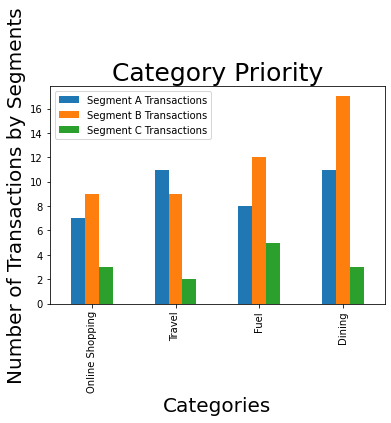

In [341]:
plt.figure(figsize=(35, 8))
plot_data = pd.DataFrame({
    "Segment A Transactions": card_transaction['Segment A Transactions'],
    "Segment B Transactions": card_transaction['Segment B Transactions'],
    "Segment C Transactions": card_transaction['Segment C Transactions']
    }   
)

plot_data.plot(kind = "bar")

# card_transaction['Segment A Transactions'].plot.bar(color='#ff6384')
# card_transaction['Segment B Transactions'].plot.bar(color='#34ff81')
# card_transaction['Segment C Transactions'].plot.bar(color='#1a74dd')
plt.title("Category Priority", fontsize=25)
plt.xlabel("Categories", fontsize=20)
plt.ylabel("Number of Transactions by Segments", fontsize=20)
plt.legend()

<Figure size 2520x2160 with 0 Axes>

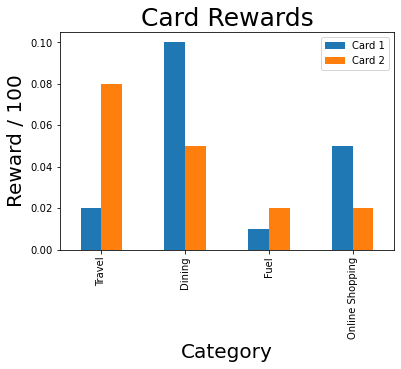

In [342]:
plt.figure(figsize=(35, 30))
plot_data = pd.DataFrame({
    "Card 1": card_detail_proxy['Card 1 Reward'],
    "Card 2": card_detail_proxy['Card 2 Reward'],
    }   
)

plot_data.plot(kind = "bar")

# card_transaction['Segment A Transactions'].plot.bar(color='#ff6384')
# card_transaction['Segment B Transactions'].plot.bar(color='#34ff81')
# card_transaction['Segment C Transactions'].plot.bar(color='#1a74dd')
plt.title("Card Rewards", fontsize=25)
plt.xlabel("Category", fontsize=20)
plt.ylabel("Reward / 100", fontsize=20)
plt.legend()

Text(0.5, 1.0, 'Segment A')

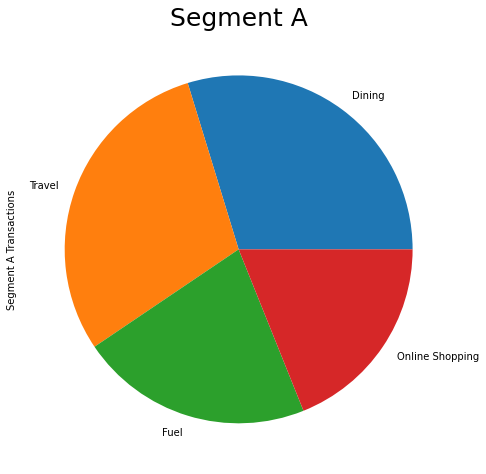

In [343]:
plt.figure(figsize=(15, 8))
categoty_transaction['Segment A Transactions'].sort_values(ascending=False).head(5).plot.pie()
plt.title("Segment A", fontsize=25)

Text(0.5, 1.0, 'Segment B')

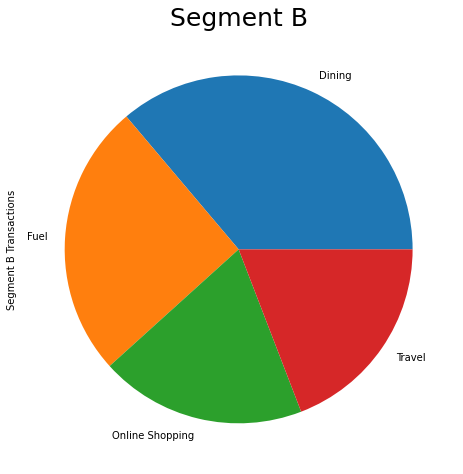

In [344]:
plt.figure(figsize=(15, 8))
categoty_transaction['Segment B Transactions'].sort_values(ascending=False).head(5).plot.pie()
plt.title("Segment B", fontsize=25)

Text(0.5, 1.0, 'Segment C')

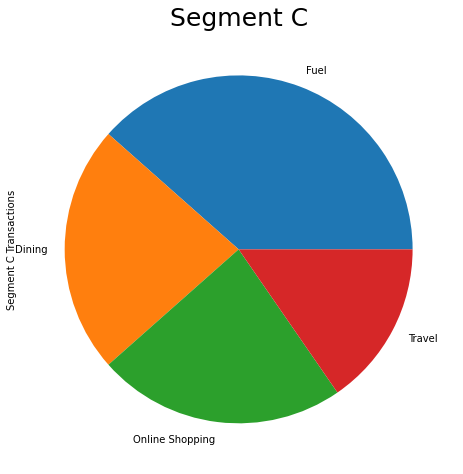

In [345]:
plt.figure(figsize=(15, 8))
categoty_transaction['Segment C Transactions'].sort_values(ascending=False).head(5).plot.pie()
plt.title("Segment C", fontsize=25)

<Figure size 7200x7200 with 0 Axes>

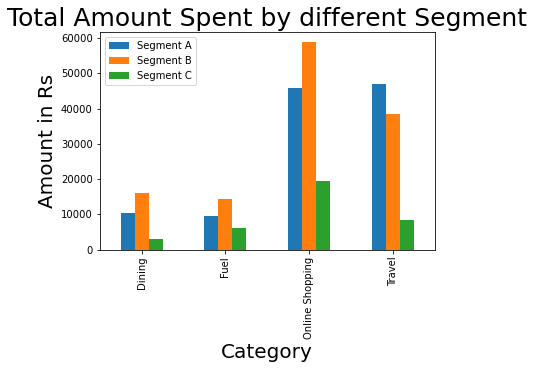

In [346]:
plt.figure(figsize=(100, 100))
plot_data = pd.DataFrame({
    "Segment A": segment_transaction['Segment A Amount'],
    "Segment B": segment_transaction['Segment B Amount'],
    "Segment C": segment_transaction['Segment C Amount'],
    }   
)

plot_data.plot(kind = "bar")
plt.title("Total Amount Spent by different Segment", fontsize=25)
plt.xlabel("Category", fontsize=20)
plt.ylabel("Amount in Rs", fontsize=20)
plt.legend()

In [378]:
customet_payment['Card 1 Total Due']

Segment
A    4653
B    6118
C    1290
Name: Card 1 Total Due, dtype: int32

In [379]:
segment_transaction['Reward A card 1'].sum()

4361

In [380]:
segment_transaction['Reward B card 1'].sum()

5461

In [381]:
segment_transaction['Reward C card 1'].sum()

1493

In [382]:
segment_transaction['Reward A card 2'].sum()

5374

In [383]:
segment_transaction['Reward B card 2'].sum()

5333

In [384]:
segment_transaction['Reward C card 2'].sum()

1333

# Febuary Transactions


In [388]:
g_categories_feb = df_transaction[df_transaction['Date']>'2018-01-01'].groupby('Category')
categoty_transaction_feb = pd.DataFrame(data=g_categories_feb.size(), columns=['Number of Transactions'])
categoty_transaction_feb['Total Payment'] = g_categories_feb['Transaction Amount'].agg("sum") 
categoty_transaction_feb['Segment A Transactions'] = df_transaction.head(221)[(df_transaction['Age']>40)&(df_transaction['Date']>'2018-01-01')].groupby('Category').size()
categoty_transaction_feb['Segment B Transactions'] =  df_transaction.head(221)[(df_transaction['Age'] < 40)&(df_transaction['Age'] > 19)&(df_transaction['Date']>'2018-01-01') ].groupby('Category').size()
categoty_transaction_feb['Segment C Transactions'] = df_transaction.head(221)[(df_transaction['Age']<20)&(df_transaction['Date']>'2018-01-01')].groupby('Category').size()
categoty_transaction_feb['Total Transactions'] = categoty_transaction_feb['Segment A Transactions']+categoty_transaction_feb['Segment B Transactions']+categoty_transaction['Segment C Transactions']
categoty_transaction_feb= categoty_transaction_feb.fillna(0)
card_transaction_feb = pd.merge(categoty_transaction_feb, card_detail, on='Category', how='outer')
card_transaction_feb= card_transaction_feb.fillna(0)

card_transaction_feb= card_transaction_feb.set_index("Category").sort_values(by = 'Total Payment', ascending=False)
card_transaction_feb

<ipython-input-388-2facadb5e83f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoty_transaction_feb['Segment A Transactions'] = df_transaction.head(221)[(df_transaction['Age']>40)&(df_transaction['Date']>'2018-01-01')].groupby('Category').size()
<ipython-input-388-2facadb5e83f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoty_transaction_feb['Segment B Transactions'] =  df_transaction.head(221)[(df_transaction['Age'] < 40)&(df_transaction['Age'] > 19)&(df_transaction['Date']>'2018-01-01') ].groupby('Category').size()
<ipython-input-388-2facadb5e83f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categoty_transaction_feb['Segment C Transactions'] = df_transaction.head(221)[(df_transaction['Age']<20)&(df_transaction['Date']>'2018-01-01')].groupby('Category').size()


,Number of Transactions,Total Payment,Segment A Transactions,Segment B Transactions,Segment C Transactions,Total Transactions,Card 1 Reward,Card 2 Reward
Category,,,,,,,,
Online Shopping,28,1185586.0,9,12.0,4.0,25.0,0.05,0.02
Travel,28,733628.0,12,12.0,2.0,26.0,0.02,0.08
Travell,1,289618.0,1,0.0,0.0,0.0,0.00,0.00
Dining,34,74104.0,11,18.0,3.0,32.0,0.10,0.05
Shopping,1,69999.0,1,0.0,0.0,0.0,0.00,0.00
Fuel,27,32265.0,8,12.0,5.0,25.0,0.01,0.02


In [389]:
segment_transaction_feb = pd.DataFrame(data=g_categories_feb.size(), columns=['Number of Transactions'])
segment_transaction_feb['Segment A Amount'] = categoty_transaction_feb['Total Payment']*(categoty_transaction_feb['Segment A Transactions']/categoty_transaction_feb['Number of Transactions'])
segment_transaction_feb['Segment B Amount'] = categoty_transaction_feb['Total Payment']*(categoty_transaction_feb['Segment B Transactions']/categoty_transaction_feb['Number of Transactions'])
segment_transaction_feb['Segment C Amount'] = categoty_transaction_feb['Total Payment']*(categoty_transaction_feb['Segment C Transactions']/categoty_transaction_feb['Number of Transactions'])
segment_transaction_feb['Reward A card 1'] = card_transaction_feb['Card 1 Reward']*segment_transaction_feb['Segment A Amount']
segment_transaction_feb['Reward B card 1'] = card_transaction_feb['Card 1 Reward']*segment_transaction_feb['Segment B Amount']
segment_transaction_feb['Reward C card 1'] = card_transaction_feb['Card 1 Reward']*segment_transaction_feb['Segment C Amount']
segment_transaction_feb['Reward A card 2'] = card_transaction_feb['Card 2 Reward']*segment_transaction_feb['Segment A Amount']
segment_transaction_feb['Reward B card 2'] = card_transaction_feb['Card 2 Reward']*segment_transaction_feb['Segment B Amount']
segment_transaction_feb['Reward C card 2'] = card_transaction_feb['Card 2 Reward']*segment_transaction_feb['Segment C Amount']
m=(segment_transaction_feb.dtypes=='float')
segment_transaction_feb.loc[:,m]=segment_transaction_feb.loc[:,m].astype(int)
segment_transaction_feb

,Number of Transactions,Segment A Amount,Segment B Amount,Segment C Amount,Reward A card 1,Reward B card 1,Reward C card 1,Reward A card 2,Reward B card 2,Reward C card 2
Category,,,,,,,,,,
Dining,34,23974,39231,6538,2397,3923,653,1198,1961,326
Fuel,27,9560,14340,5975,95,143,59,191,286,119
Online Shopping,28,381081,508108,169369,19054,25405,8468,7621,10162,3387
Shopping,1,69999,0,0,0,0,0,0,0,0
Travel,28,314412,314412,52402,6288,6288,1048,25152,25152,4192
Travell,1,289618,0,0,0,0,0,0,0,0


In [391]:
g_customer_payment_feb = df_customer_payment[df_customer_payment['Date']>'2018-01-01'].groupby('Segment')
customet_payment_feb = pd.DataFrame(data=g_customer_payment_feb.size(), columns=['Number of People'])
customet_payment_feb['Total Payment'] = g_customer_payment_feb['Total Payment'].agg('sum')
customet_payment_feb['Total Dues'] = g_customer_payment_feb['Total Due'].agg('sum')
customet_payment_feb['Average Payment'] = customet_payment_feb['Total Payment']/customet_payment_feb['Number of People']
customet_payment_feb['Average Due'] = customet_payment_feb['Total Dues']/customet_payment_feb['Number of People']
customet_payment_feb['Card 1 Due'] = customet_payment_feb['Average Due']*0.02
customet_payment_feb['Card 2 Due'] = customet_payment_feb['Average Due']*0.08
customet_payment_feb['Card 1 Total Due'] = customet_payment_feb['Total Dues']*0.02
customet_payment_feb['Card 2 Total Due'] = customet_payment_feb['Total Dues']*0.08
m=(customet_payment_feb.dtypes=='float')
customet_payment_feb.loc[:,m]=customet_payment_feb.loc[:,m].astype(int)
customet_payment_feb

,Number of People,Total Payment,Total Dues,Average Payment,Average Due,Card 1 Due,Card 2 Due,Card 1 Total Due,Card 2 Total Due
Segment,,,,,,,,,
A,3,14128,1178248,4709,392749,7854,31419,23564,94259
B,6,21874,1144264,3645,190710,3814,15256,22885,91541
C,1,3506,25375,3506,25375,507,2030,507,2030
